## Perceptron using sklearn 


In [55]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets as dts
import sklearn.model_selection as ms 
import sklearn.linear_model as lm 
import sklearn.metrics as metrics


In [47]:
# generate classification dataset 
dataset = dts.make_classification(n_samples=1000, n_features=2,n_redundant=0,random_state=7)


In [48]:
# split into test train sets 
X = dataset[0]
y = dataset[1]

x_train, x_test, y_train, y_test = ms.train_test_split(X,y, test_size=0.20)

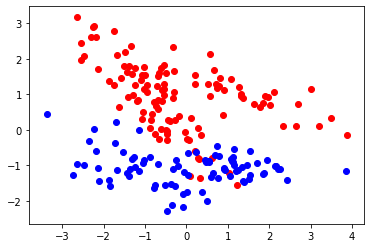

In [52]:
# seperate classes and plot them

red_x = x_test[np.where(y_test ==1)[0]]
blue_x = x_test[np.where(y_test ==0)[0]]

plt.scatter(red_x[:,0], red_x[:,1], color="red")
plt.scatter(blue_x[:,0], blue_x[:,1], color="blue")

plt.show()

In [59]:
# fit perceptron algorithm to classification data

perceptron = lm.Perceptron(max_iter=100)
perceptron.fit(x_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
# get predicition and accuracy 
y_pred = perceptron.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

0.94

In [77]:
# get decision boundary paramaters 
w = perceptron.coef_[0]
slope = -(w[0]/w[1])
intercept = -(1.0/w[1])


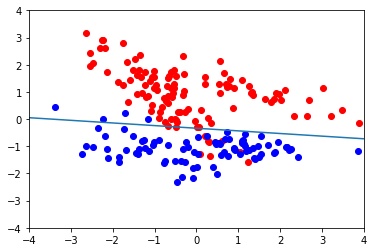

In [79]:
# scatter plot with decision boundary
x_values = np.linspace(-5,5,1000)
desc_boundary = slope*x_values+ intercept 

plt.scatter(red_x[:,0], red_x[:,1], color="red")
plt.scatter(blue_x[:,0], blue_x[:,1], color="blue")
plt.plot(x_values, desc_boundary)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

## Manual coded perceptron 
